In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from jieba import lcut
from collections import Counter
import warnings
import matplotlib.font_manager as fm  # 确保导入字体管理

warnings.filterwarnings("ignore")  # 忽略无关警告


# --------------------------
# 终极中文显示配置（不依赖本地字体文件，强制生效）
# --------------------------
def fix_chinese_display():
    # 1. 强制设置中文字体（覆盖所有可能的配置）
    plt.rcParams['font.sans-serif'] = ['DejaVu Sans', 'SimHei', 'WenQuanYi Zen Hei', 'Microsoft YaHei']
    plt.rcParams['axes.unicode_minus'] = False  # 解决负号乱码

    # 2. 手动添加系统黑体字体（绕过字体识别问题）
    try:
        # 遍历系统所有字体，找到黑体（SimHei）并设置
        for font in fm.fontManager.ttflist:
            if 'SimHei' in font.name or 'Hei' in font.name:
                fm.fontManager.addfont(font.fname)
                plt.rcParams['font.family'] = font.name
                print(f"成功加载系统字体：{font.name}")
                break
    except Exception as e:
        # 若遍历失败，直接使用matplotlib自带中文字体
        plt.rcParams['font.family'] = 'sans-serif'
        plt.rcParams['font.sans-serif'] = ['SimHei', 'WenQuanYi Zen Hei']
        print(f"字体加载 fallback：{e}，已启用自带中文字体")

    # 3. 验证配置是否生效
    print(f"当前字体配置：{plt.rcParams['font.sans-serif']}")
    print(f"负号显示配置：{plt.rcParams['axes.unicode_minus']}")


# 执行中文修复
fix_chinese_display()


# --------------------------
# 1. 数据加载与预处理（基础模块）
# 方法说明：完成数据清洗、情感得分合成、天气细分，为后续分析铺垫
# --------------------------
def load_and_preprocess_data(file_path, encoding="utf-8"):
    """加载数据并完成预处理：情感得分合成、天气类型细分"""
    # 1.1 读取数据
    df = pd.read_csv(file_path, encoding=encoding)
    print("\n=== 数据基础信息 ===")
    print(f"数据总行数：{len(df)}，总字段数：{len(df.columns)}")
    print(f"天气类型分布：\n{df['天气'].value_counts()}")
    print(f"emotion_type分布：\n{df['emotion_type'].value_counts()}\n")

    # 1.2 合成情感得分（方向×强度）：解决sentiment文本型问题
    sentiment_dir = {"正面": 1, "负面": -1, "中性": 0}
    df["sentiment_dir"] = df["sentiment"].map(sentiment_dir)
    df["intensity"] = pd.to_numeric(df["intensity"], errors="coerce").fillna(df["intensity"].mean())
    df["sentiment_score"] = df["sentiment_dir"] * df["intensity"]

    # 1.3 天气类型细分（核心：覆盖所有天气，避免片面性）
    # ① 按“降水与否”分类（雨/雪=降水天，其他=无降水天）
    df["是否降水"] = df["天气"].str.contains("雨", na=False).map({True: "降水天", False: "无降水天"})
    # ② 按“能见度”分类（雾=低能见度，其他=高能见度）
    df["能见度等级"] = df["天气"].apply(lambda x: "低能见度" if "雾" in x else "高能见度")
    # ③ 保留原始天气类型（用于全量分组）
    df["原始天气类型"] = df["天气"]

    return df


# 执行数据预处理（替换为你的文件路径）
df = load_and_preprocess_data("情感分析结果（限制情感大类）最终版.csv", encoding="utf-8")


成功加载系统字体：Microsoft YaHei
当前字体配置：['DejaVu Sans', 'SimHei', 'WenQuanYi Zen Hei', 'Microsoft YaHei']
负号显示配置：False

=== 数据基础信息 ===
数据总行数：5519，总字段数：22
天气类型分布：
天气
晴        4388
多云~小雨     577
雾~晴       554
Name: count, dtype: int64
emotion_type分布：
emotion_type
愉悦     2535
无情绪    1563
怀旧      758
烦躁      346
失望      233
悲伤       84
Name: count, dtype: int64



=== 开始天气类型细分分析 ===


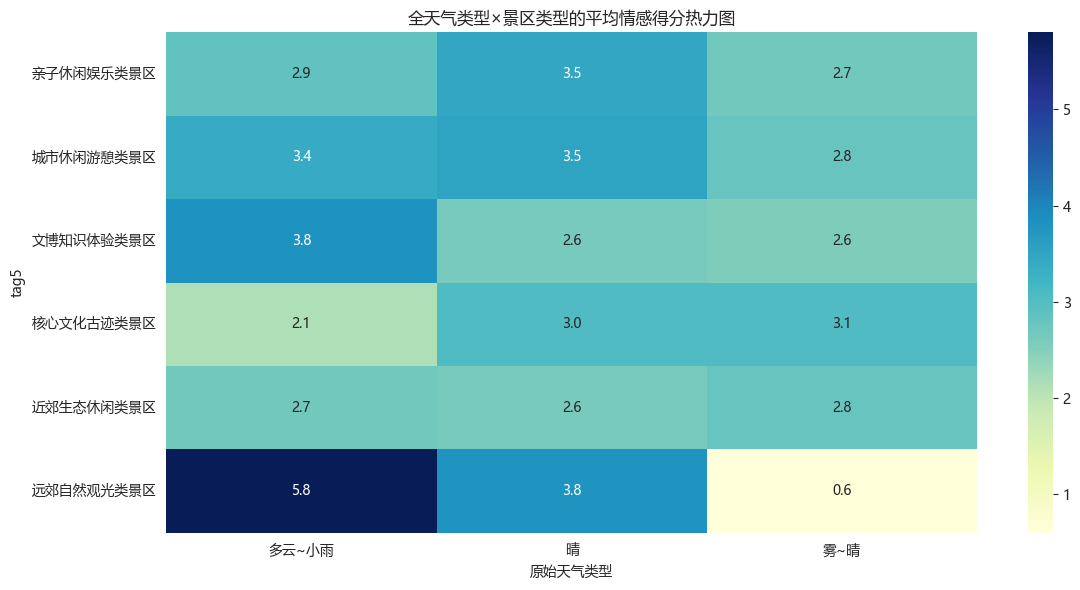

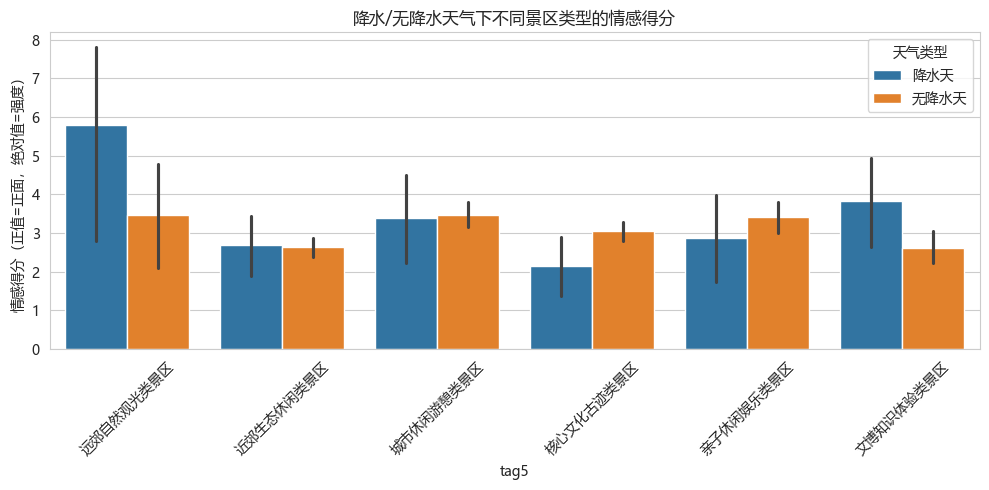

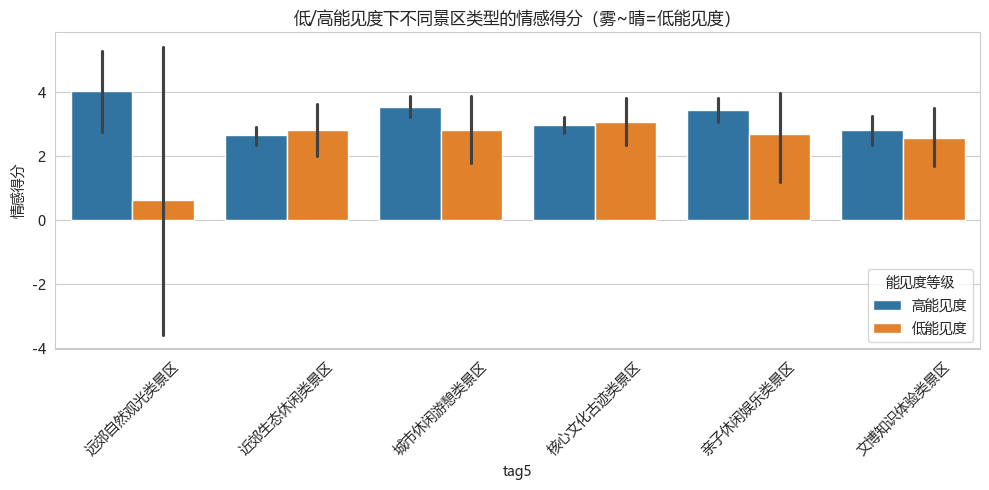

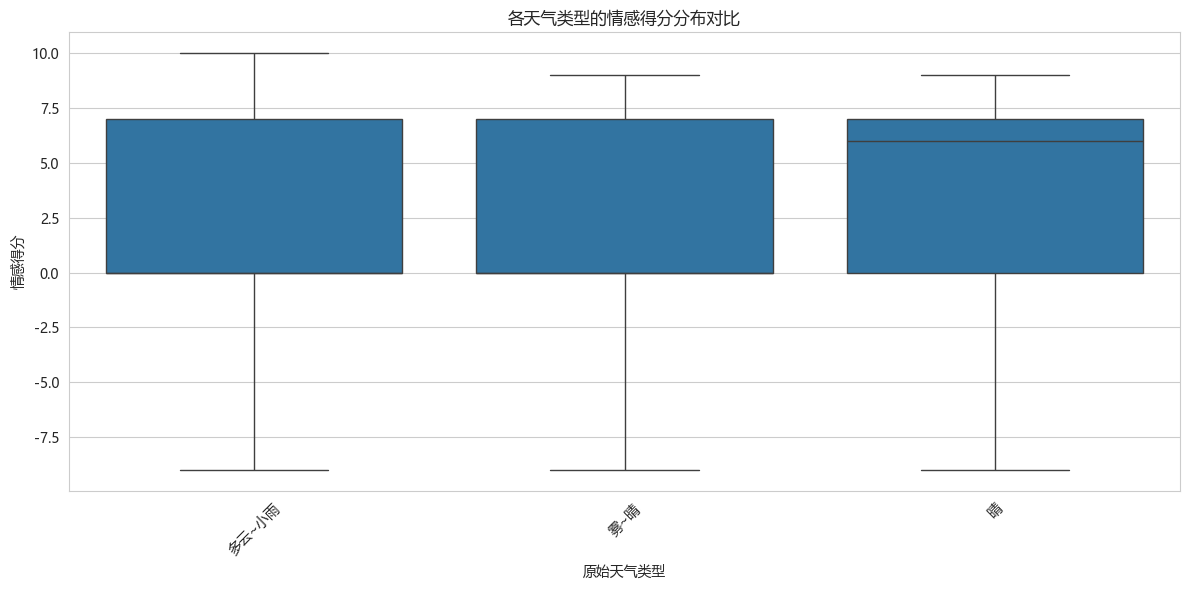


=== 开始emotion_type深度分析 ===


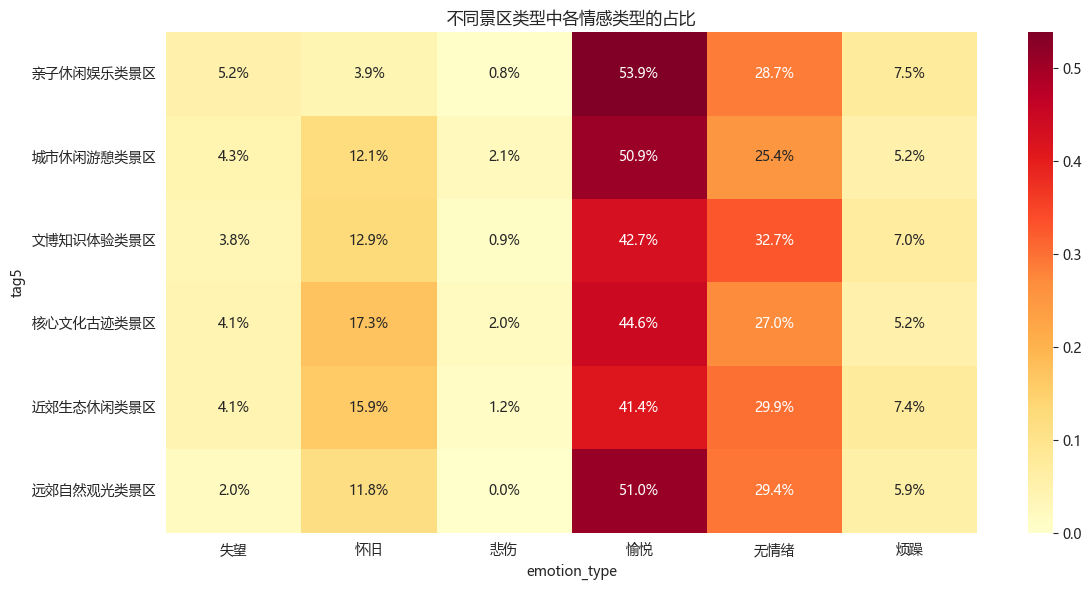

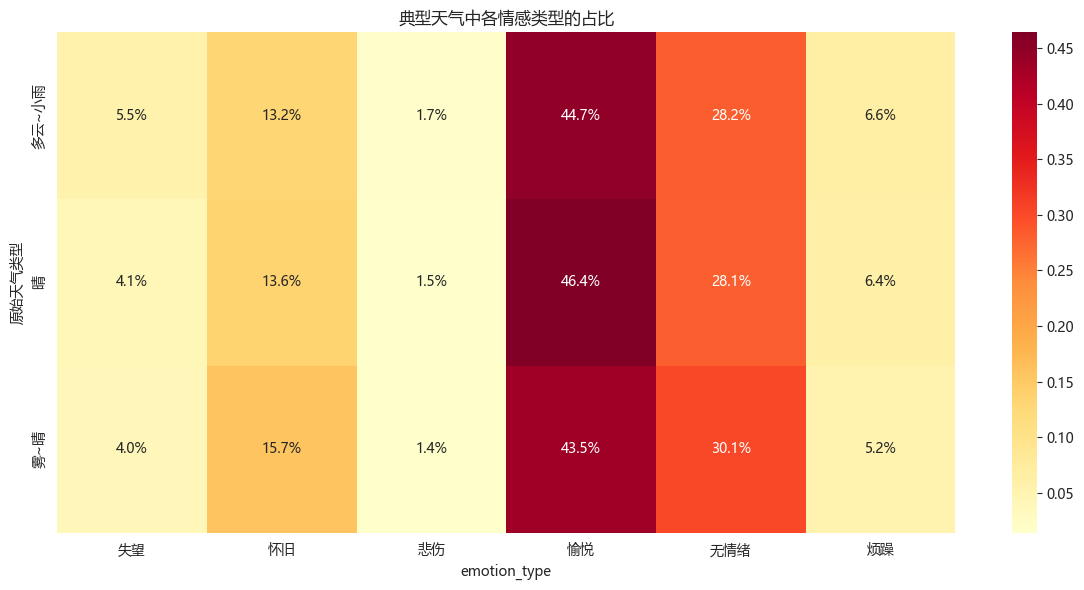

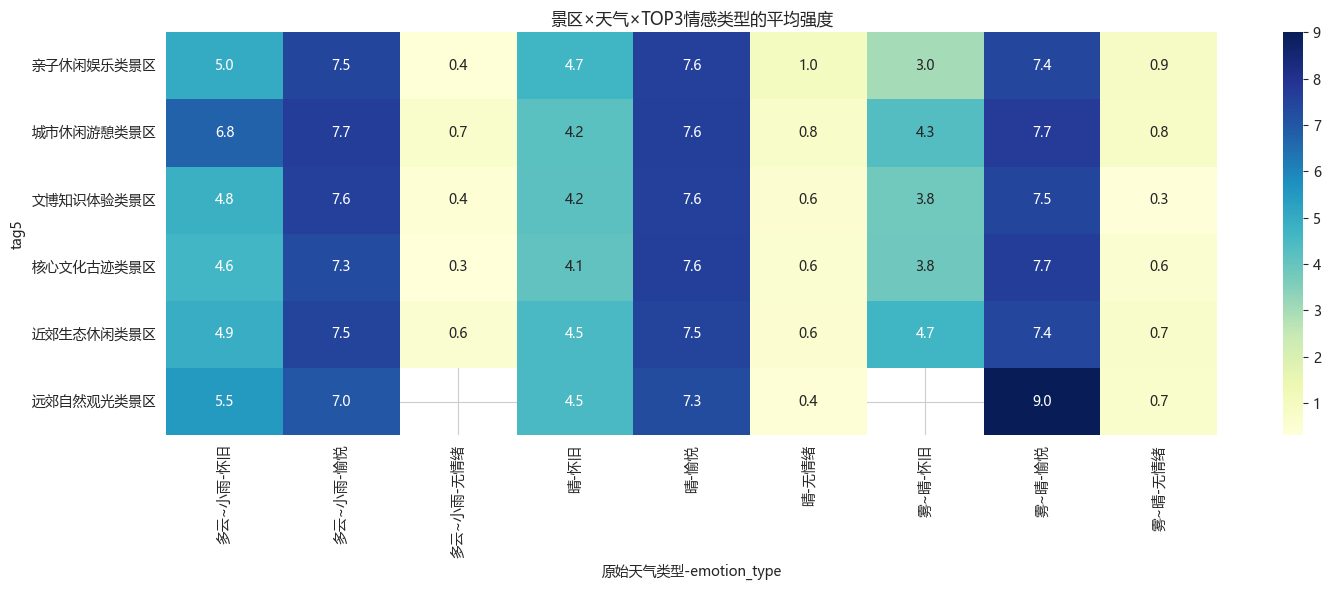

<Figure size 1200x600 with 0 Axes>

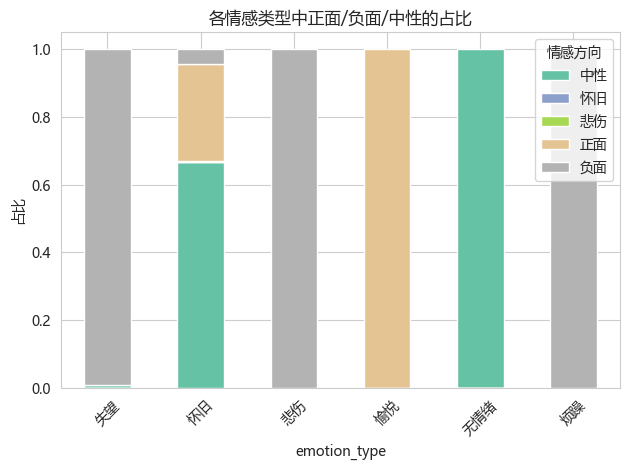

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\keyne\AppData\Local\Temp\jieba.cache



=== 开始文本关键词分析 ===


Loading model cost 0.634 seconds.
Prefix dict has been built successfully.


“怀旧”情感高频词：[('金陵', 83), ('梧桐', 77), ('南京城', 49), ('秋天', 42), ('梧桐树', 38), ('一句', 32), ('大道', 28), ('种满', 26), ('城是', 25), ('泊秦淮', 25)]
“愉悦”情感高频词：[('动物园', 157), ('秋天', 132), ('真的', 117), ('喜欢', 117), ('红山', 107), ('明孝陵', 81), ('金陵', 80), ('南京博物院', 78), ('玄武湖', 74), ('可爱', 74)]
“悲伤”情感高频词：[('悲伤', 10), ('没有', 8), ('南京大屠杀', 7), ('王嘉尔', 6), ('不敢', 5), ('侵华日军南京大屠杀遇难同胞纪念馆', 5), ('我们', 5), ('离开', 4), ('苦涩', 4), ('事情', 4)]
“烦躁”情感高频词：[('苦涩', 20), ('真的', 17), ('周末', 12), ('允悲', 12), ('鸽子', 11), ('上班', 10), ('南京博物院', 10), ('好多', 10), ('骑行', 10), ('什么', 9)]
“失望”情感高频词：[('没有', 24), ('苦涩', 14), ('真的', 13), ('动物', 13), ('看到', 12), ('还是', 11), ('允悲', 11), ('可惜', 11), ('自己', 10), ('梧桐', 10)]
文化古迹+雾~晴+怀旧场景高频词：[('梧桐', 6), ('金陵', 4), ('泊秦淮', 4), ('秦淮', 3), ('酒家', 3), ('瞻园', 3), ('银杏', 3), ('一年', 3), ('鸡鸣寺', 3), ('老门东', 2)]


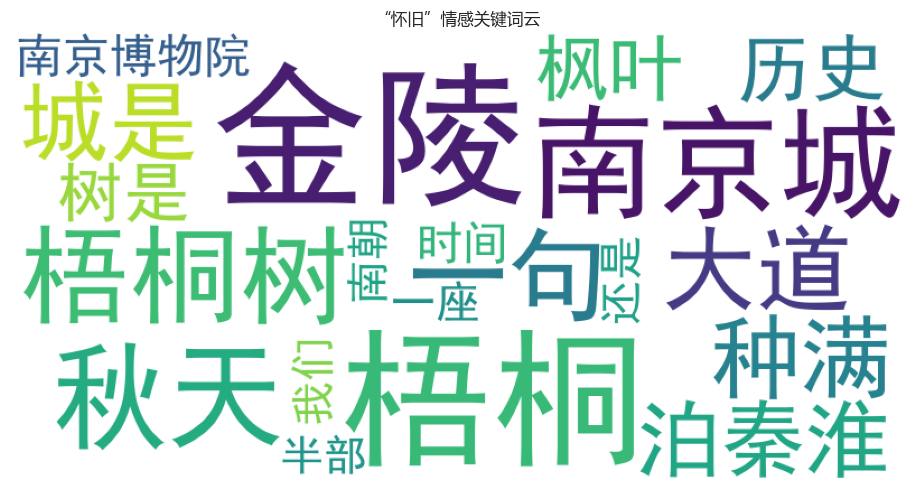

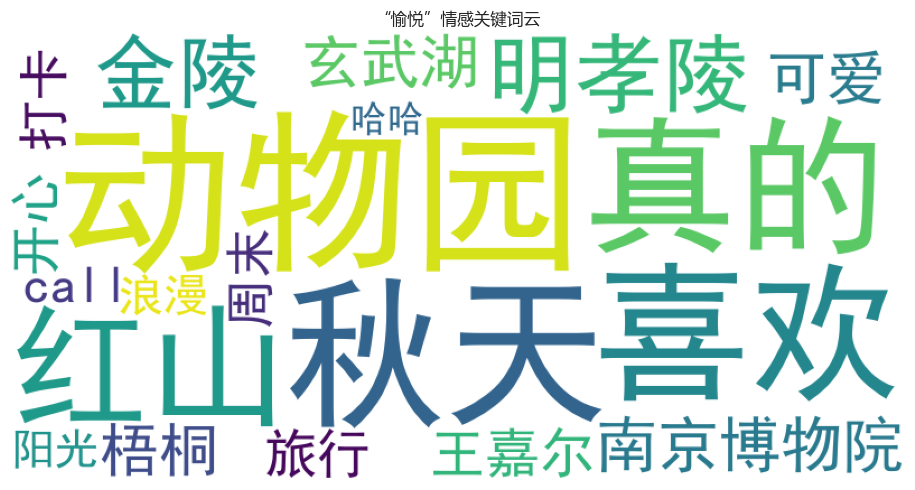

In [2]:

# --------------------------
# 2. 天气类型细分分析（核心模块1）
# 方法说明：全天气类型覆盖，对比降水、能见度等维度对情感的影响
# --------------------------
def weather_segment_analysis(df):
    print("=== 开始天气类型细分分析 ===")
    # 2.1 原始天气类型×景区类型的情感得分热力图（全量覆盖）
    plt.figure(figsize=(12, 6))
    pivot_weather_tag = df.pivot_table(
        index="tag5", columns="原始天气类型", values="sentiment_score", aggfunc="mean"
    )
    sns.heatmap(pivot_weather_tag, annot=True, cmap="YlGnBu", fmt=".1f")
    plt.title("全天气类型×景区类型的平均情感得分热力图")
    plt.tight_layout()
    plt.savefig("天气-景区情感热力图.png", dpi=300, bbox_inches="tight")
    plt.show()

    # 2.2 降水与否×景区类型的情感对比
    plt.figure(figsize=(10, 5))
    sns.barplot(x="tag5", y="sentiment_score", hue="是否降水", data=df)
    plt.title("降水/无降水天气下不同景区类型的情感得分")
    plt.ylabel("情感得分（正值=正面，绝对值=强度）")
    plt.xticks(rotation=45)
    plt.legend(title="天气类型")
    plt.tight_layout()
    plt.savefig("降水-景区情感对比.png", dpi=300, bbox_inches="tight")
    plt.show()

    # 2.3 能见度等级×景区类型的情感对比（重点含雾~晴）
    plt.figure(figsize=(10, 5))
    sns.barplot(x="tag5", y="sentiment_score", hue="能见度等级", data=df)
    plt.title("低/高能见度下不同景区类型的情感得分（雾~晴=低能见度）")
    plt.ylabel("情感得分")
    plt.xticks(rotation=45)
    plt.legend(title="能见度等级")
    plt.tight_layout()
    plt.savefig("能见度-景区情感对比.png", dpi=300, bbox_inches="tight")
    plt.show()

    # 2.4 各天气类型的情感分布箱线图（对比离散程度）
    plt.figure(figsize=(12, 6))
    sns.boxplot(x="原始天气类型", y="sentiment_score", data=df)
    plt.title("各天气类型的情感得分分布对比")
    plt.ylabel("情感得分")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.savefig("天气情感分布箱线图.png", dpi=300, bbox_inches="tight")
    plt.show()


# 执行天气细分分析
weather_segment_analysis(df)


# --------------------------
# 3. emotion_type深度分析（核心模块2）
# 方法说明：结合情感类型，挖掘具体情感倾向与场景的关联
# --------------------------
def emotion_type_analysis(df):
    print("\n=== 开始emotion_type深度分析 ===")
    # 3.1 景区类型×emotion_type的占比热力图
    plt.figure(figsize=(12, 6))
    tag_emotion_count = df.groupby(["tag5", "emotion_type"]).size().unstack(fill_value=0)
    tag_emotion_pct = tag_emotion_count.div(tag_emotion_count.sum(axis=1), axis=0)  # 转换为百分比
    sns.heatmap(tag_emotion_pct, annot=True, cmap="YlOrRd", fmt=".1%")
    plt.title("不同景区类型中各情感类型的占比")
    plt.tight_layout()
    plt.savefig("景区-情感类型占比.png", dpi=300, bbox_inches="tight")
    plt.show()

    # 3.2 典型天气×emotion_type的占比（晴/雾~晴/雨天）
    typical_weather = ["晴", "雾~晴", "多云~小雨"]  # 可根据数据调整
    weather_emotion_df = df[df["原始天气类型"].isin(typical_weather)]
    plt.figure(figsize=(12, 6))
    weather_emotion_count = weather_emotion_df.groupby(["原始天气类型", "emotion_type"]).size().unstack(fill_value=0)
    weather_emotion_pct = weather_emotion_count.div(weather_emotion_count.sum(axis=1), axis=0)
    sns.heatmap(weather_emotion_pct, annot=True, cmap="YlOrRd", fmt=".1%")
    plt.title("典型天气中各情感类型的占比")
    plt.tight_layout()
    plt.savefig("天气-情感类型占比.png", dpi=300, bbox_inches="tight")
    plt.show()

    # 3.3 三维交叉：景区×天气×emotion_type的强度对比（取TOP3情感类型）
    top3_emotions = df["emotion_type"].value_counts().index[:3]
    three_dim_df = df[df["emotion_type"].isin(top3_emotions)]
    plt.figure(figsize=(15, 6))
    pivot_three_dim = three_dim_df.pivot_table(
        index="tag5", columns=["原始天气类型", "emotion_type"], values="intensity", aggfunc="mean"
    )
    sns.heatmap(pivot_three_dim, annot=True, cmap="YlGnBu", fmt=".1f")
    plt.title(f"景区×天气×TOP3情感类型的平均强度")
    plt.tight_layout()
    plt.savefig("三维交叉-情感强度.png", dpi=300, bbox_inches="tight")
    plt.show()

    # 3.4 各emotion_type的正负倾向（与sentiment对应）
    plt.figure(figsize=(12, 6))
    emotion_sent_pct = df.groupby(["emotion_type", "sentiment"]).size().unstack(fill_value=0)
    emotion_sent_pct = emotion_sent_pct.div(emotion_sent_pct.sum(axis=1), axis=0)
    emotion_sent_pct.plot(kind="bar", stacked=True, colormap="Set2")
    plt.title("各情感类型中正面/负面/中性的占比")
    plt.ylabel("占比")
    plt.xticks(rotation=45)
    plt.legend(title="情感方向")
    plt.tight_layout()
    plt.savefig("情感类型-正负倾向.png", dpi=300, bbox_inches="tight")
    plt.show()


# 执行emotion_type分析
emotion_type_analysis(df)


# --------------------------
# 4. 文本关键词挖掘（辅助模块）
# 方法说明：用文本解释情感与场景的关联原因
# --------------------------
def text_keyword_analysis(df):
    print("\n=== 开始文本关键词分析 ===")
    # 定义停用词
    stopwords = ["的", "了", "在", "是", "我", "有", "和", "就", "都", "也", "很",
                 "南京", "今天", "这里", "一个", "比较", "非常", "景区", "景点", "天气",
                 "##", " ", "，", "。", "！", "？"]

    # 4.1 通用关键词提取函数（修正函数名，避免未定义错误）
    def get_keywords(text_series, top_n=20):
        if text_series.empty:  # 处理空文本情况
            return []
        all_text = " ".join(text_series.dropna())
        words = [w for w in lcut(all_text) if w not in stopwords and len(w) > 1]
        return Counter(words).most_common(top_n)

    # 4.2 提取特定情感类型的高频词（以“怀旧”“喜悦”为例）
    # 先检查情感类型是否存在，避免空数据
    emotion_types = df["emotion_type"].unique()
    target_emotions = ["怀旧", "愉悦", "悲伤", "烦躁", "失望"]
    for emotion in target_emotions:
        if emotion not in emotion_types:
            print(f"提示：数据中无“{emotion}”类型的情感数据，跳过提取")
            continue
        keywords = get_keywords(df[df["emotion_type"] == emotion]["message"])
        if not keywords:
            print(f"“{emotion}”情感无有效关键词（可能样本量不足）")
        else:
            print(f"“{emotion}”情感高频词：{keywords[:10]}")

    # 4.3 特定场景关键词（如“文物古迹+雾~晴+怀旧”）
    # 先检查场景是否有数据
    scene_filter = (
            (df["tag5"] == "核心文化古迹类景区") &
            (df["原始天气类型"] == "雾~晴") &
            (df["emotion_type"] == "怀旧")
    )
    scene_text = df[scene_filter]["message"]
    if len(scene_text) < 5:  # 样本量过少时提示
        print(f"特定场景（文化古迹+雾~晴+怀旧）样本量不足（{len(scene_text)}条），跳过关键词提取")
    else:
        scene_keys = get_keywords(scene_text)
        print(f"文化古迹+雾~晴+怀旧场景高频词：{scene_keys[:10]}")

    # 4.4 词云可视化（优化空值处理）
    try:
        from wordcloud import WordCloud
        def plot_wordcloud(keywords, title):
            if not keywords:  # 无关键词时不绘制
                print(f"“{title}”无有效关键词，不生成词云图")
                return
            # 词云强制使用系统黑体（避免词云中文乱码）
            wc = WordCloud(
                font_path=fm.findfont(fm.FontProperties(family='SimHei')),  # 动态获取黑体路径
                background_color="white", width=800, height=400
            ).generate_from_frequencies(dict(keywords))
            plt.figure(figsize=(10, 5))
            plt.imshow(wc)
            plt.axis("off")
            plt.title(title)
            plt.tight_layout()
            plt.savefig(f"{title}.png", dpi=300, bbox_inches="tight")
            plt.show()

        # 为存在的情感类型绘制词云
        if "怀旧" in emotion_types:
            nostalgia_keys = get_keywords(df[df["emotion_type"] == "怀旧"]["message"])
            plot_wordcloud(nostalgia_keys, "“怀旧”情感关键词云")
        if "愉悦" in emotion_types:
            joy_keys = get_keywords(df[df["emotion_type"] == "愉悦"]["message"])
            plot_wordcloud(joy_keys, "“愉悦”情感关键词云")
    except ImportError:
        print("提示：未安装wordcloud库，跳过词云图（pip install wordcloud可安装）")


# 执行文本关键词分析
text_keyword_analysis(df)


In [3]:

# --------------------------
# 5. 统计检验与结论验证
# 方法说明：用方差分析验证结果显著性，避免偶然性
# --------------------------
def statistical_validation(df):
    print("\n=== 开始统计检验 ===")
    # 预处理：确保sentiment_score为数值且无缺失
    df["sentiment_score"] = pd.to_numeric(df["sentiment_score"], errors="coerce").fillna(0)

    # 筛选样本量足够的天气类型
    min_sample = 10
    valid_weather = df["原始天气类型"].value_counts()[df["原始天气类型"].value_counts() >= min_sample].index
    df = df[df["原始天气类型"].isin(valid_weather)]
    weather_groups = [df[df["原始天气类型"] == w]["sentiment_score"] for w in valid_weather]

    # 方差齐性检验（改用median方法增强稳健性）
    try:
        levene_result = stats.levene(*weather_groups, center='median')
        print(f"方差齐性检验（全天气）：p值={levene_result.pvalue:.4f}（>0.05满足齐性）")
    except Exception as e:
        print(f"方差齐性检验失败：{e}，直接进行Kruskal-Wallis检验")
        levene_result = None

    # 双向方差分析或Kruskal-Wallis检验
    if levene_result is not None and levene_result.pvalue > 0.05:
        # 方差齐性满足，尝试双向方差分析
        try:
            import statsmodels.api as sm
            from statsmodels.formula.api import ols
            model = ols('sentiment_score ~ C(tag5) + C(原始天气类型) + C(tag5):C(原始天气类型)', data=df).fit()
            anova_table = sm.stats.anova_lm(model, typ=2)
            print("\n双向方差分析结果（主效应+交互效应）：")
            print(anova_table[["sum_sq", "F", "PR(>F)"]].round(4))

            # 解读交互效应
            if anova_table.loc["C(tag5):C(原始天气类型)", "PR(>F)"] < 0.05:
                print("\n结论：景区类型与天气类型的交互效应显著（p<0.05），即天气对情感的影响因景区类型而异！")
            else:
                print("\n结论：交互效应不显著，天气对情感的影响在各景区类型中趋势一致。")
                # 交互效应不显著时，执行Kruskal-Wallis检验（验证天气对情感的整体影响）
                from scipy.stats import kruskal
                kruskal_result = kruskal(*weather_groups)
                print("\nKruskal-Wallis非参数检验（验证天气对情感的整体影响）：")
                print(f"统计量={kruskal_result.statistic:.4f}, p值={kruskal_result.pvalue:.4f}")
                if kruskal_result.pvalue < 0.05:
                    print("结论：不同天气类型的情感得分存在显著差异！")
                else:
                    print("结论：不同天气类型的情感得分无显著差异。")
        except Exception as e:
            print(f"双向方差分析失败：{e}，执行Kruskal-Wallis检验")
            from scipy.stats import kruskal
            kruskal_result = kruskal(*weather_groups)
            print("\nKruskal-Wallis非参数检验：")
            print(f"统计量={kruskal_result.statistic:.4f}, p值={kruskal_result.pvalue:.4f}")
            if kruskal_result.pvalue < 0.05:
                print("结论：不同天气类型的情感得分存在显著差异！")
            else:
                print("结论：不同天气类型的情感得分无显著差异。")
    else:
        # 方差齐性不满足，直接执行Kruskal-Wallis检验
        from scipy.stats import kruskal
        kruskal_result = kruskal(*weather_groups)
        print("\nKruskal-Wallis非参数检验：")
        print(f"统计量={kruskal_result.statistic:.4f}, p值={kruskal_result.pvalue:.4f}")
        if kruskal_result.pvalue < 0.05:
            print("结论：不同天气类型的情感得分存在显著差异！")
        else:
            print("结论：不同天气类型的情感得分无显著差异。")

    # 调节效应：不同景区类型中能见度与情感的相关性
    print("\n不同景区类型中能见度与情感的相关性（调节效应）：")
    vis_corr = []
    for tag in df["tag5"].unique():
        sub_df = df[df["tag5"] == tag].copy()
        sub_df["能见度数值"] = sub_df["能见度等级"].map({"低能见度": 0, "高能见度": 1})
        corr = sub_df["能见度数值"].corr(sub_df["sentiment_score"])
        vis_corr.append({"景区类型": tag, "能见度-情感相关系数": round(corr, 3)})
    print(pd.DataFrame(vis_corr).sort_values(by="能见度-情感相关系数", ascending=False))

    # 调节效应：不同景区类型中降水与情感的相关性
    print("\n不同景区类型中降水与情感的相关性（调节效应）：")
    rain_corr = []
    # 遍历所有景区类型（tag5）
    for tag in df["tag5"].unique():
    # 筛选当前类型的子数据集
        sub_df = df[df["tag5"] == tag].copy()
    # 将“是否降水”转换为数值（降水天=1，无降水天=0，便于计算相关系数）
        sub_df["降水数值"] = sub_df["是否降水"].map({"无降水天": 1, "降水天": 0})
    # 计算降水与情感得分的相关系数（皮尔逊相关）
        corr = sub_df["降水数值"].corr(sub_df["sentiment_score"])
    # 存储结果（保留3位小数）
        rain_corr.append({"景区类型": tag, "降水-情感相关系数": round(corr, 3)})
# 按相关系数降序输出，便于观察不同类型的差异
    print(pd.DataFrame(rain_corr).sort_values(by="降水-情感相关系数", ascending=False))

# 执行统计检验
statistical_validation(df)
print("\n=== 全流程分析完成！所有图表已保存为PNG文件 ===")


=== 开始统计检验 ===
方差齐性检验（全天气）：p值=0.1548（>0.05满足齐性）

双向方差分析结果（主效应+交互效应）：
                        sum_sq       F  PR(>F)
C(tag5)               532.8438  4.3626  0.0006
C(原始天气类型)              38.7719  0.7936  0.4523
C(tag5):C(原始天气类型)     364.3460  1.4915  0.1355
Residual           134377.4855     NaN     NaN

结论：交互效应不显著，天气对情感的影响在各景区类型中趋势一致。

Kruskal-Wallis非参数检验（验证天气对情感的整体影响）：
统计量=2.4052, p值=0.3004
结论：不同天气类型的情感得分无显著差异。

不同景区类型中能见度与情感的相关性（调节效应）：
        景区类型  能见度-情感相关系数
0  远郊自然观光类景区       0.227
2  城市休闲游憩类景区       0.044
4  亲子休闲娱乐类景区       0.038
5  文博知识体验类景区       0.018
3  核心文化古迹类景区      -0.007
1  近郊生态休闲类景区      -0.011

不同景区类型中降水与情感的相关性（调节效应）：
        景区类型  降水-情感相关系数
3  核心文化古迹类景区      0.057
4  亲子休闲娱乐类景区      0.032
2  城市休闲游憩类景区      0.004
1  近郊生态休闲类景区     -0.003
5  文博知识体验类景区     -0.083
0  远郊自然观光类景区     -0.155

=== 全流程分析完成！所有图表已保存为PNG文件 ===
